In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색 > 프로야구 연봉 데이터 살펴보기
## [프로야구 연봉 데이터셋의 기본 정보]

In [22]:
picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [23]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [33]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


## 예측할 대상인 '연봉'에 대한 정보

In [25]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

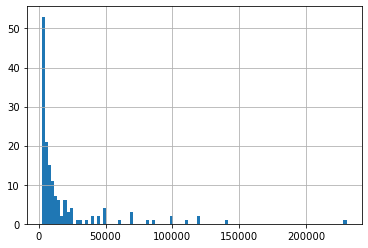

In [26]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

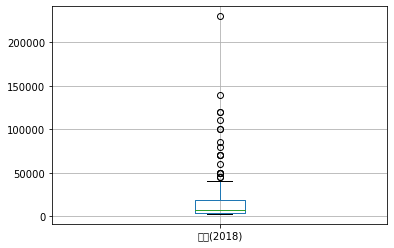

In [27]:
picher.boxplot(column=['연봉(2018)'])

In [36]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [37]:
# 피처 각각의 대한 histogram을 출력
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

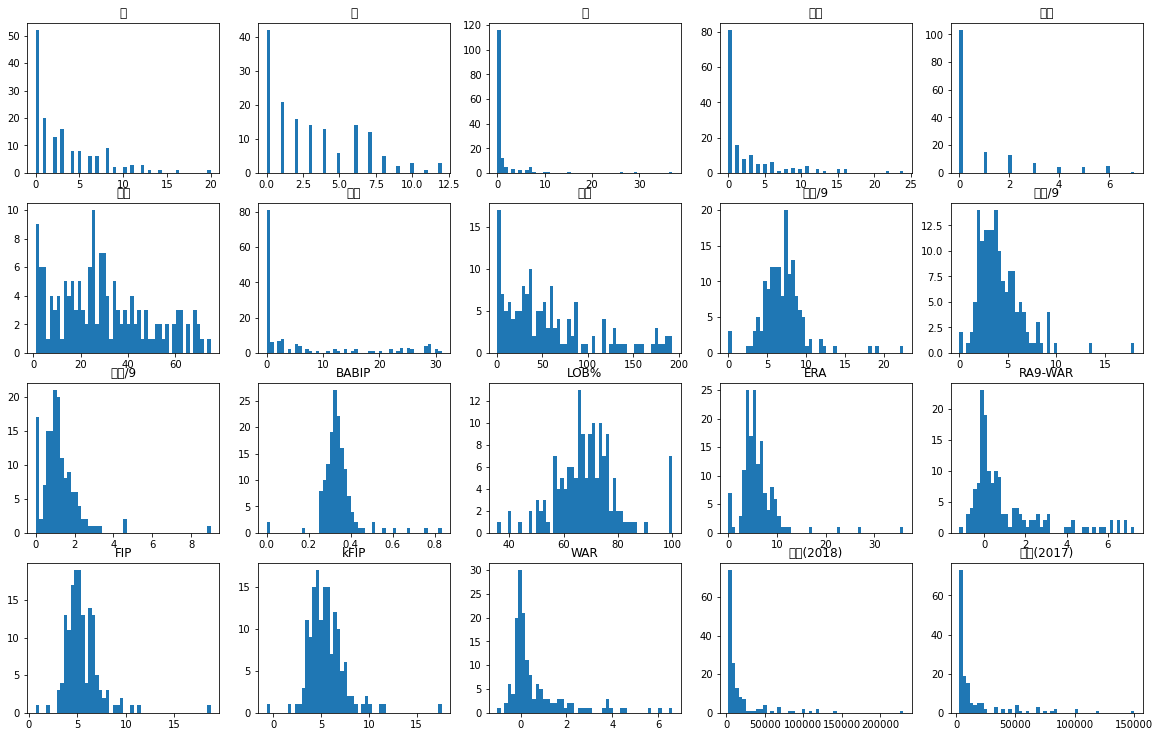

In [38]:
plot_hist_each_column(picher_features_df)

# <Step. 예측> : 투수의 연봉 예측하기
### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [44]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific이 아닌 float 모양으로 출력하게 해줍니다.
pd.options.mode.chained_assignment = None

In [45]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean() # 평균
        series_std = df[col].std()   # 표준편차
        df[col] = df[col].apply(lambda x:(x-series_mean)/series_std)
    return df


In [47]:
# 피처 각각에 대한 scaling을 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [54]:
picher_df = picher_df.rename(columns={"연봉(2018)":"y"})
picher_df.head(5)

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [55]:
# 팀명 피처를 one-hot-encoding으로 변환
# 과일(피처) : "딸기", "키워", "멜론"
# [0,0,1] [0,1,0] [1,0,0]
# 글자 피처 -> y=x1y1+b 형태로 변환

team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명',axis=1)
picher_df = picher_df.join(team_encoding)

KeyError: '팀명'

In [56]:
team_encoding.head(10)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0,0,0


In [57]:
picher_df.head(5)

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


### 회귀 분석을 위한 학습 데이터 데이터셋 분리

In [61]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split # x데이터와 y데이터를 훈련데이터와 테스트데이터로 분리
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명','y'])] # 선수명과 y(연봉(2018))를 제외한 모든 컬럼을 x
y = picher_df['y']                                          # 연봉(2018)을 예측
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=19)  # 비율 8:2

In [62]:
X_train.shape

(121, 28)

In [64]:
y_train.shape

(121,)

In [63]:
X_test.shape

(31, 28)

In [65]:
y_test.shape

(31,)

### 회귀 분석 계수 학습 & 학습된 계수 출력

In [66]:
# 회귀 분석 계수를 학습(회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)

In [67]:
# 학습된 계수를 출력
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [68]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

# <Step.평가> : 예측 모델 평가하기
### [어떤 피처가 가장 영향력이 강한 피처일까]

In [69]:
import statsmodels.api as sm
# 분석방법 : 경사하강법 / sklearn, statsmodels(통계적 분석방법)
# statsmodels 라이브러리로 회귀 분석을 수행합니다
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           7.70e-42
Time:                        16:04:19   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### [피처들의 상관관계 분석]

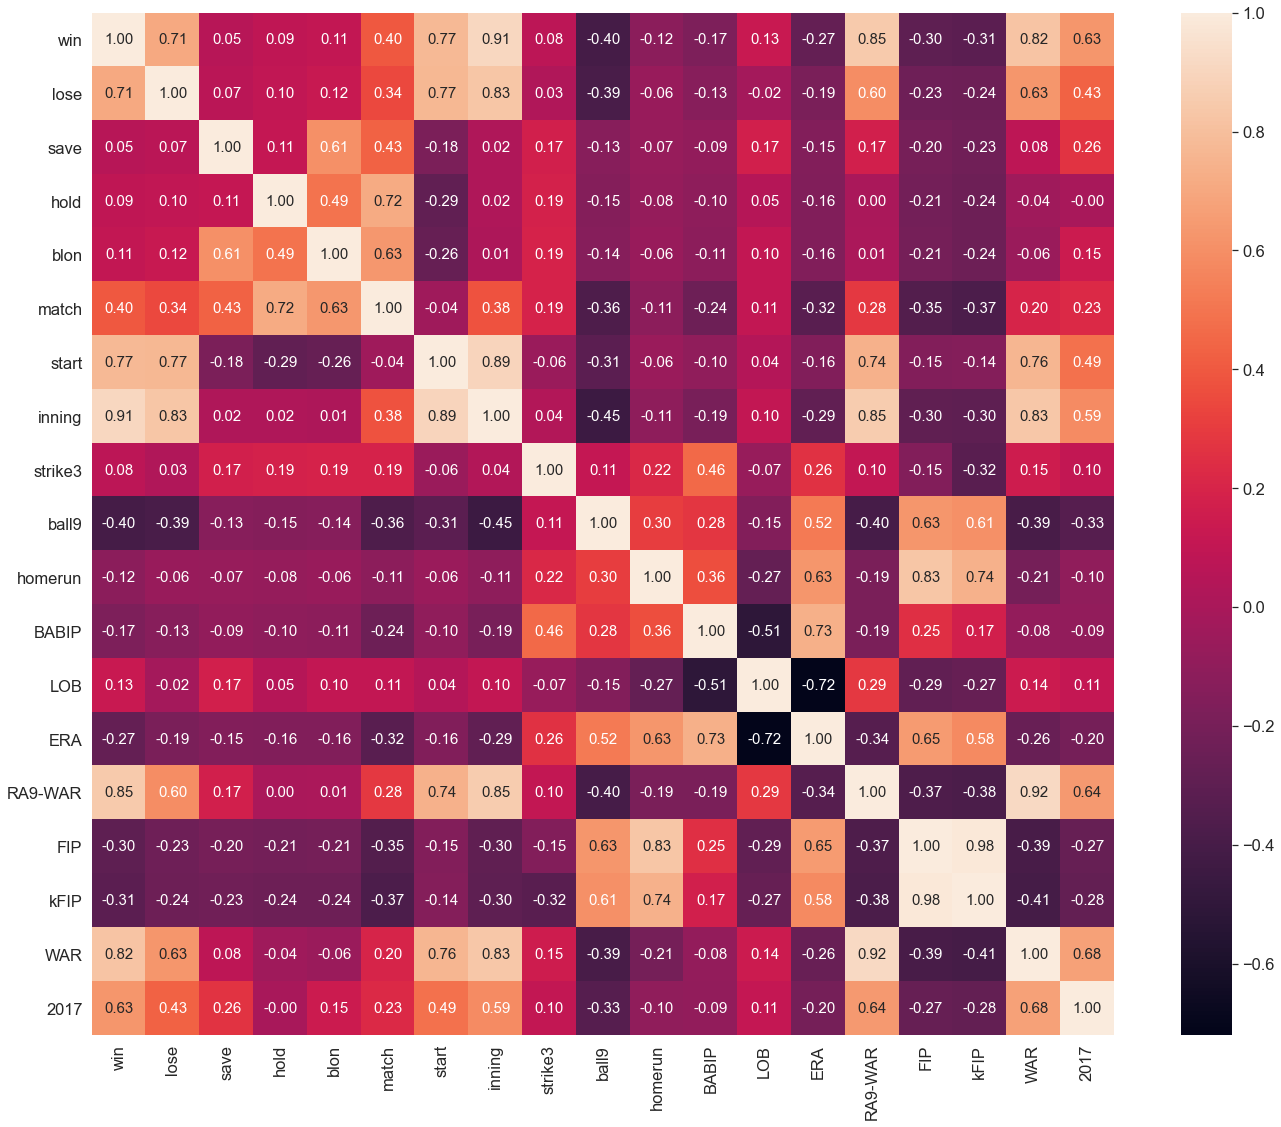

In [72]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산
corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 'inning', 'strike3',
       'ball9', 'homerun', 'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','2017']

# corr 행렬 히트맵을 시각화
plt.rc('font',family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar =True,
                annot =True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = show_cols,
                xticklabels = show_cols)
plt.tight_layout()
plt.show()

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공전성 확인]

In [73]:
# 다중공전성이랑? 변수간의 상관관계가 높아서 분석에 부정적인 영향을 미치는 것을 의미한다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# 피처마다의 VIF 계수를 출력 (공전성 검증)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

# VIF Factor가 높을 수록 변수간 상관관계가 높아지기 때문에 제거해야된다는 것을 알 수 있다.(공전성의 문제)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### [적절한 피처로 다시 학습하기] 

In [78]:
# 피처를 재선정합니다.
X = picher_df[["FIP","WAR","볼넷/9","삼진/9","연봉(2017)"]]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=19) 

# 모델 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)

In [79]:
# 결과를 출력합니다.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9150591192570362
0.9038759653889864


In [80]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train,y_predictions))) # train RMSE score를 출력합니다
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predictions))) # test RMSE score를 출력합니다

7893.462873347692
13141.866063591087


In [81]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[["FIP","WAR","볼넷/9","삼진/9","연봉(2017)"]]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


### [예상 연봉과 실제 연봉 비교]


In [82]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[["FIP","WAR","볼넷/9","삼진/9","연봉(2017)"]]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [90]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명','연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'],ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher,on=['선수명'], how = 'left')
result_df = result_df[['선수명','y','예측연봉(2018)','연봉(2017)']]
result_df.columns =['선수명','실제연봉(2018)','예측연봉(2018)','작년연봉(2017)']
result_df.head(10)


,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,163930.148696,150000
1,켈리,140000,120122.822204,85000
2,소사,120000,88127.019455,50000
3,정우람,120000,108489.464585,120000
4,레일리,111000,102253.697589,85000
5,차우찬,100000,116009.684582,100000
6,장원준,100000,110139.334841,100000
7,피어밴드,85000,58975.725734,35000
8,윤성환,80000,87453.777232,80000
9,우규민,70000,72214.641606,70000
